---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [74]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from adspy_shared_utilities import plot_fruit_knn

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

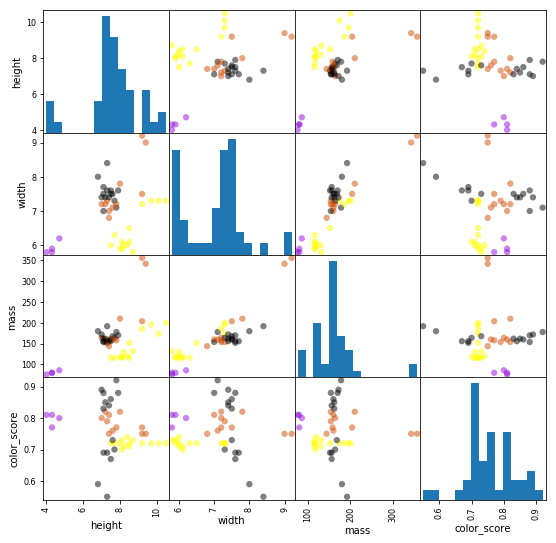

In [5]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', 
                                     s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

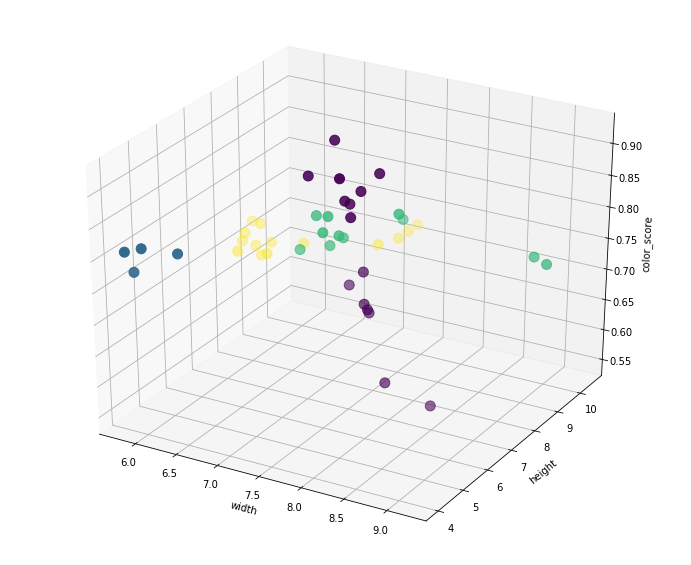

In [6]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [8]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [11]:
knn.score(X_test, y_test)

0.5333333333333333

In [12]:
pred = knn.predict(X_test)

In [14]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]
             precision    recall  f1-score   support

          1       0.50      0.75      0.60         4
          2       1.00      1.00      1.00         1
          3       0.75      0.38      0.50         8
          4       0.25      0.50      0.33         2

avg / total       0.63      0.53      0.54        15



### Use the trained k-NN classifier model to classify new, previously unseen objects

In [15]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [16]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

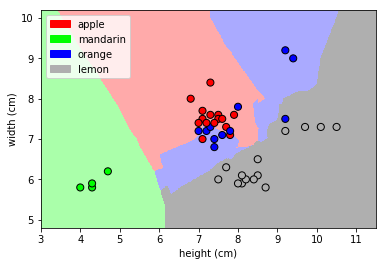

In [18]:
from adspy_shared_utilities import plot_fruit_knn
fig =plt.figure(figsize=(12,10))
plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

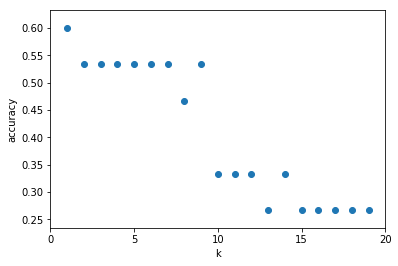

In [19]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

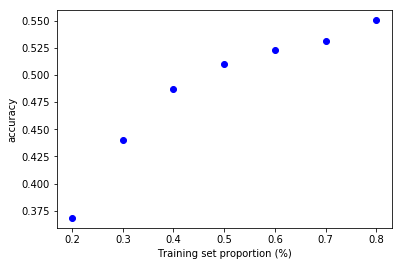

In [20]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

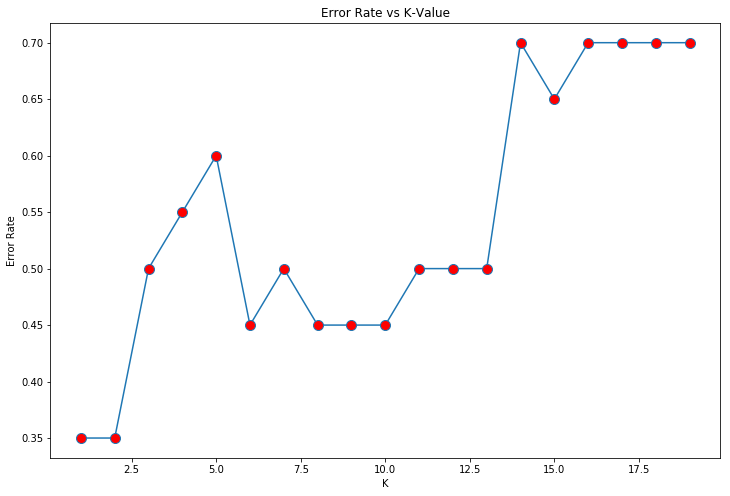

In [23]:
plt.figure(figsize=(12,8))
plt.plot(range(1,20), error_rate, ls='-', marker='o', markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K-Value")
plt.xlabel("K")
plt.ylabel("Error Rate");

In [51]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [52]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [54]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[4 0 2 0]
 [4 0 0 0]
 [1 0 3 0]
 [0 0 0 6]]
             precision    recall  f1-score   support

          1       0.44      0.67      0.53         6
          2       0.00      0.00      0.00         4
          3       0.60      0.75      0.67         4
          4       1.00      1.00      1.00         6

avg / total       0.55      0.65      0.59        20



/usr/local/Cellar/python3/3.6.4_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [56]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2 0 4 0]
 [0 0 4 0]
 [0 0 4 0]
 [0 0 5 1]]
             precision    recall  f1-score   support

          1       1.00      0.33      0.50         6
          2       0.00      0.00      0.00         4
          3       0.24      1.00      0.38         4
          4       1.00      0.17      0.29         6

avg / total       0.65      0.35      0.31        20



/usr/local/Cellar/python3/3.6.4_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
param_grid = {'C':[0.01,0.1,1,10,100,1000, 10000], 'gamma':[10,1,0.1,0.01,0.001,0.0001,0.0001]}

In [68]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=3, refit=True)

In [69]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV] C=0.01, gamma=10 ................................................
[CV] ....... C=0.01, gamma=10, score=0.3333333333333333, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ....... C=0.01, gamma=10, score=0.4166666666666667, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ....... C=0.01, gamma=10, score=0.4166666666666667, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........ C=0.01, gamma=1, score=0.3333333333333333, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........ C=0.01, gamma=1, score=0.4166666666666667, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........ C=0.01, gamma=1, score=0.4166666666666667, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...... C=0

/usr/local/Cellar/python3/3.6.4_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.3333333333333333, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ......... C=10, gamma=10, score=0.5333333333333333, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ........................ C=10, gamma=10, score=0.5, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ......... C=10, gamma=10, score=0.5833333333333334, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......... C=10, gamma=1, score=0.7333333333333333, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......... C=10, gamma=1, score=0.4166666666666667, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......... C=10, gamma=1, score=0.5833333333333334, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[CV] .................. C=1000, gamma=0.0001, score=0.5, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................. C=1000, gamma=0.0001, score=0.75, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.4666666666666667, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .................. C=1000, gamma=0.0001, score=0.5, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................. C=1000, gamma=0.0001, score=0.75, total=   0.0s
[CV] C=10000, gamma=10 ...............................................
[CV] ...... C=10000, gamma=10, score=0.5333333333333333, total=   0.0s
[CV] C=10000, gamma=10 ...............................................
[CV] ..................... C=10000, gamma=10, score=0.5, total=   0.0s
[CV] C=10000, gamma=10 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [70]:
grid.best_params_

{'C': 10000, 'gamma': 0.001}

In [71]:
grid.best_estimator_

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
grid_predictions = grid.predict(X_test)

In [73]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[4 0 2 0]
 [0 4 0 0]
 [1 0 3 0]
 [0 0 1 5]]
             precision    recall  f1-score   support

          1       0.80      0.67      0.73         6
          2       1.00      1.00      1.00         4
          3       0.50      0.75      0.60         4
          4       1.00      0.83      0.91         6

avg / total       0.84      0.80      0.81        20



In [75]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[4 0 0 2]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 1 5]]
             precision    recall  f1-score   support

          1       1.00      0.67      0.80         6
          2       1.00      1.00      1.00         4
          3       0.80      1.00      0.89         4
          4       0.71      0.83      0.77         6

avg / total       0.87      0.85      0.85        20



In [76]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[5 0 0 1]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 6]]
             precision    recall  f1-score   support

          1       1.00      0.83      0.91         6
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         4
          4       0.86      1.00      0.92         6

avg / total       0.96      0.95      0.95        20



In [79]:
fruit_prediction = rfc.predict([[20, 4.3, 5.5, .35]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [82]:
fruit_prediction = rfc.predict([[100, 6.3, 8.5, .65]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39, 4)
(39,)
(20, 4)
(20,)
